# NLP Analysis of World Cup 2022 Tweets

### About the dataset

This dataset contains 30,000 tweets from the first day of the FIFA World Cup 2022. The dataset includes tweets in English containing the hashtag #WorldCup2022

The dataset was created using the Snscrape and the cardiffnlp/twitter-roberta-base-sentiment-latest model in Hugging Face Hub.

https://www.kaggle.com/datasets/tirendazacademy/fifa-world-cup-2022-tweets

### Goal of this project

The goal of this project is to train a classification model for sentiment classification and to explore interesting sentiments expressed by tweeters at the onset of the world cup. 

### Exploratory Data Analysis

In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\71062489\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Import Dataset
tweets_df = pd.read_csv('fifa_world_cup_2022_tweets.csv')

print(tweets_df.columns)

Index(['Unnamed: 0', 'Date Created', 'Number of Likes', 'Source of Tweet',
       'Tweet', 'Sentiment'],
      dtype='object')


We know that there were protests against hosting the World Cup in Qatar, whether due to FIFA corruption, human rights abuses in Qatar, the banning of alcohol sales in the stadiums, or the banning of the OneLove armband. 

Before we train our model, it will be interesting to dig a little deeper into what the negative tweets mean. 

[Text(0.5, 1.0, 'World Cup 2022 Sentiment')]

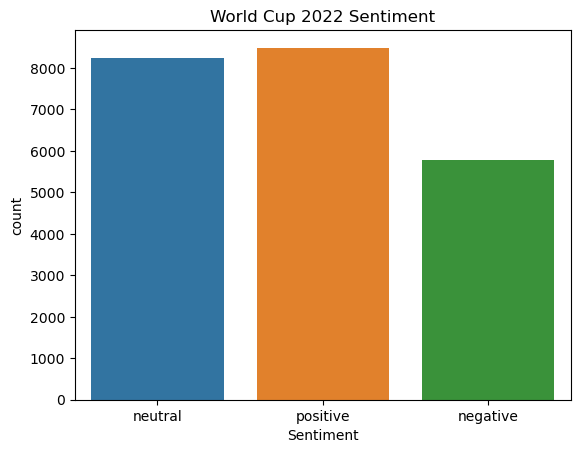

In [4]:
# See distribution of sentiment among tweet dataset. 
sns.countplot(x=tweets_df["Sentiment"]).set(title='World Cup 2022 Sentiment')

We see that there are slightly more neutral and positive tweets than negative tweets. 

[Text(0.5, 1.0, 'Most Liked Tweets World Cup 2022 Sentiment')]

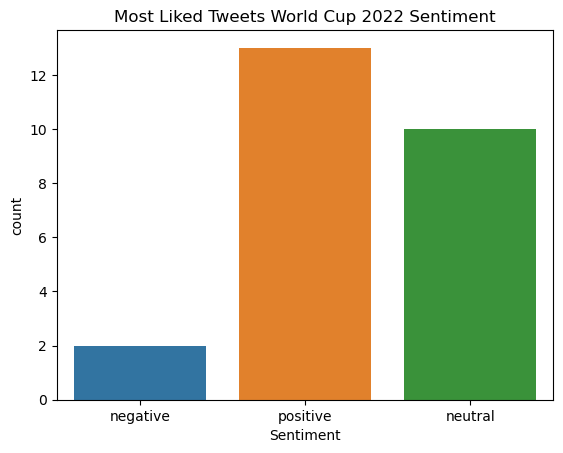

In [5]:
most_liked_tweets = tweets_df.loc[tweets_df['Number of Likes'] >= 1000]

sns.countplot(x=most_liked_tweets["Sentiment"]).set(title='Most Liked Tweets World Cup 2022 Sentiment')

However, when we look at the tweets that recieved a 1000 likes or more, we can see that only 2 of them were negative. Assumming more people doll out likes than write posts, perhaps the wider twitter audience has more positive sentiment about the World Cup than negative. 

What are the two most popular negative tweets? 

In [6]:
# The two most liked negative tweets
print(most_liked_tweets['Tweet'].loc[most_liked_tweets['Sentiment']=='negative'])

212    "It's Palestine..."\n\nLebanese fans refuse to...
677    @LinahAlsaafin Never forget when #IsraeliApart...
Name: Tweet, dtype: object


#### Most Liked Negative Tweets 

They appear to be about the Israeli–Palestinian conflict:

"It's Palestine...Lebanese fans refuse to be interviewed by an Israeli TV reporter after he said that he is from 'Israel' at #WorldCup2022 in Qatar."

"Never forget when #IsraeliApartheid murdered 4 children playing football in Gaza."



#### Tweet sentiment as game time approached

[Text(0.5, 1.0, 'Sentiment Leading up to the Game')]

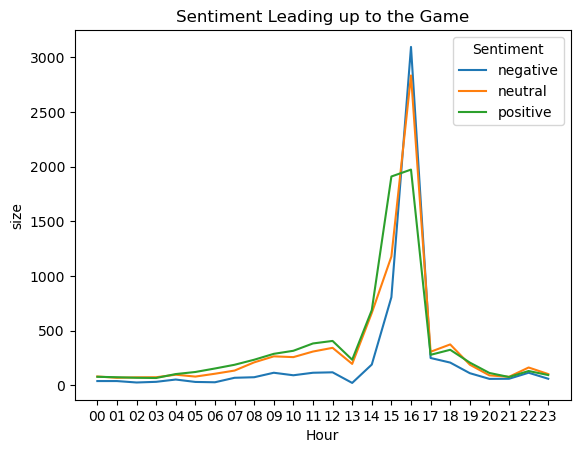

In [36]:
# Create Dataframe to get number of tweets per hour grouped by sentiment. 
time_df = tweets_df[['Date Created', 'Sentiment']].copy()
time_df['Date Created'] = pd.to_datetime(time_df['Date Created']) 
time_df['Hour'] = time_df['Date Created'].dt.strftime('%H')
time_df = time_df.drop('Date Created', axis=1)

time_df = time_df.groupby(["Hour", "Sentiment"], as_index=False)["Sentiment"].size()

sns.lineplot(x='Hour', y='size', hue='Sentiment', data=time_df).set(title='Sentiment Leading up to the Game')

Based on our plot, it looks like the most tweets took place in the 5 hours leading up to the first game, which started at 19:00 CST. 

4 hours before the game, it looks like negative and neutral tweets spiked. This is probably because tweeters who want to express negative views are more likely to tweet right before the game (in hopes of having their tweet trending) and because businesses want to promote themselves/products close to gametime. 

Positive tweets had a spike as well, probably due to excitement leading up to the game. 

### Sentiment Classification Model

Now that we've seen a few interesting things about the data, let's create our Sentiment Classification model. 

https://thecleverprogrammer.com/2022/08/29/process-of-nlp-using-python/